# Converting from BatteryData.Energy.Gov Data

[BatteryData.Energy.Gov](https://BatteryData.Energy.Gov) stores data for cells in two CSV files: one with the time series data and another with cycle-level summaries.
Here, we show how to convert them into HDF5 format.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from batdata.extractors.batterydata import BDExtractor
from pathlib import Path
import pandas as pd

Configuration

In [2]:
test_file_path = Path('../tests/files/batterydata/')

## Load Example Data
The test directory in BatData has two example files from [XCEL project.](https://batterydata.energy.gov/project/xcel)

In [3]:
raw_data = pd.read_csv(test_file_path / 'p492-13-raw.csv')
raw_data.head()

,Cycle_Index,Step,Time_s,Amphr,Watthr,Current_A,Voltage_V,Cell_Temperature_C,Temp2,Datenum_d,...,Z_Phase_Degree,Z_Real_Ohm,Absolute_Charge_Throughput_Ah,Charge_Throughput_Ah,Absolute_Energy_Throughput_Wh,Energy_Throughput_Wh,Cycle_Label,Segment_Label,Differential_Capacity_Ah_V,Differential_Voltage_V_Ah
0,1,1,0.0000,0.0,0.0,0.0,3.276036,29.7005,29.5556,737792.442373,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1,1,0.0167,0.0,0.0,0.0,3.271916,29.7005,29.5556,737792.442373,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,1,1,0.0833,0.0,0.0,0.0,3.272068,29.7005,29.5556,737792.442419,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,1,2,0.0835,0.0,0.0,0.0,3.271458,29.7005,29.5556,737792.442419,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,1,2,0.1823,0.0,0.0,0.0,3.271916,29.7166,29.5233,737792.442500,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
sum_data = pd.read_csv(test_file_path / 'p492-13-summary.csv')
sum_data.head()

,Cycle_Index,Cycle_Label,Time_s,Time_d,Datenum_d,datenum_d,Absolute_Charge_Throughput_Ah,Absolute_Energy_Throughput_Wh,Equivalent_Full_Cycles,Charge_Throughput_Ah,...,V_avg,I_min,I_max,I_avg,P_min,P_max,P_avg,T_min,T_max,T_avg
0,1,NaN,0.0000,0.000000,737792.442373,0.000000,0.000720,0.002264,0.016550,-0.000720,...,3.087111,-0.000950,0.000000,-0.000406,0,0.003100,0.001277,29.7005,29.9420,29.852910
1,2,Capacity check,105.9990,0.001227,737792.515984,0.073611,0.044328,0.162758,1.019585,-0.000588,...,3.689191,-0.000950,0.000950,0.000003,0,0.003895,0.003421,29.5877,29.9903,29.853699
2,3,NaN,2920.2430,0.033799,737794.470324,2.027951,0.054974,0.200878,1.264457,0.010059,...,3.399835,0.000000,0.019007,0.004138,0,0.070289,0.014826,29.7166,29.9581,29.845681
3,4,NaN,3073.8708,0.035577,737795.356597,2.914225,0.105357,0.389864,2.423301,0.021200,...,3.827341,-0.019009,0.019071,0.001882,0,0.078182,0.031994,29.6522,29.9742,29.856074
4,5,HPPC,3426.6666,0.039660,737795.601609,3.159236,0.129115,0.476588,2.969756,0.001947,...,3.688296,-0.095132,0.071259,-0.001706,0,0.380704,0.007371,29.7005,29.9581,29.847417


Our example is going to rename some of these files into batdata's schema.

## Detecting File Groupings
The extractors in batdata serve two functions: separate a directory of files into units that describe the same battery, then extract the data into our standard format. 

We start with the detection

In [5]:
extractor = BDExtractor()

In [6]:
groups = list(extractor.identify_files(test_file_path))
groups

[['../tests/files/batterydata/p492-13-raw.csv',
  '../tests/files/batterydata/p492-13-summary.csv']]

Note how we find one group of two files: the summary and time-series data.

## Extract into Standard Format
Given these groups, compiling into the batdata library is one further call.

In [7]:
data = extractor.parse_to_dataframe(groups[0])

By default, the extractor only reads columns that are defined in the batdata schema. It takes those columns and converts them into the units or conventions we specify in the schema as well (e.g., `current` is in Amps and negative for discharge).

In [8]:
data.raw_data

,cycle_number,step_index,test_time,current,voltage,temperature,time
0,0,0,0.0000,-0.0,3.276036,29.7005,1.578066e+09
1,0,0,0.0167,-0.0,3.271916,29.7005,1.578066e+09
2,0,0,0.0833,-0.0,3.272068,29.7005,1.578066e+09
3,0,1,0.0835,-0.0,3.271458,29.7005,1.578066e+09
4,0,1,0.1823,-0.0,3.271916,29.7166,1.578066e+09
...,...,...,...,...,...,...,...
1534,7,207,4873.8056,-0.0,3.298314,29.8776,1.579108e+09
1535,7,207,4877.1390,-0.0,3.310979,29.9098,1.579108e+09
1536,7,207,4880.4723,-0.0,3.319066,29.9259,1.579108e+09
1537,7,207,4883.8056,-0.0,3.323949,29.8937,1.579108e+09


You can make it store the extra columns as well by changing an option of the extractor

In [9]:
extractor.store_all = True

In [10]:
dataset = extractor.parse_to_dataframe(groups[0])
dataset.raw_data

,cycle_number,step_index,test_time,current,voltage,temperature,time,Amphr,Watthr,Temp2,...,Z_Phase_Degree,Z_Real_Ohm,Absolute_Charge_Throughput_Ah,Charge_Throughput_Ah,Absolute_Energy_Throughput_Wh,Energy_Throughput_Wh,Cycle_Label,Segment_Label,Differential_Capacity_Ah_V,Differential_Voltage_V_Ah
0,0,0,0.0000,-0.0,3.276036,29.7005,1.578066e+09,0.0,0.0,29.5556,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1,0,0,0.0167,-0.0,3.271916,29.7005,1.578066e+09,0.0,0.0,29.5556,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2,0,0,0.0833,-0.0,3.272068,29.7005,1.578066e+09,0.0,0.0,29.5556,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
3,0,1,0.0835,-0.0,3.271458,29.7005,1.578066e+09,0.0,0.0,29.5556,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
4,0,1,0.1823,-0.0,3.271916,29.7166,1.578066e+09,0.0,0.0,29.5233,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,7,207,4873.8056,-0.0,3.298314,29.8776,1.579108e+09,0.0,0.0,29.6040,...,NaN,NaN,0.148657,0.000471,0.545862,0.007873,Aging cycle,NaN,NaN,NaN
1535,7,207,4877.1390,-0.0,3.310979,29.9098,1.579108e+09,0.0,0.0,29.6363,...,NaN,NaN,0.148657,0.000471,0.545862,0.007873,Aging cycle,NaN,NaN,NaN
1536,7,207,4880.4723,-0.0,3.319066,29.9259,1.579108e+09,0.0,0.0,29.7008,...,NaN,NaN,0.148657,0.000471,0.545862,0.007873,Aging cycle,NaN,NaN,NaN
1537,7,207,4883.8056,-0.0,3.323949,29.8937,1.579108e+09,0.0,0.0,29.5879,...,NaN,NaN,0.148657,0.000471,0.545862,0.007873,Aging cycle,NaN,NaN,NaN


## Available Data
The BatteryData datasets hold many types of data

### Time Series Data
The time-series measurements from equipment are stored in the `raw_data` subset of a BatteryDataset.

Text(0, 0.5, 'Current (A)')

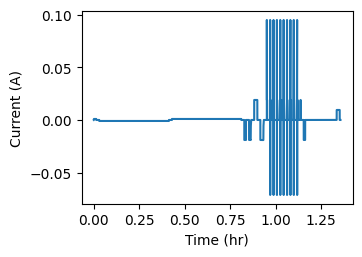

In [11]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.plot(dataset.raw_data['test_time'] / 3600, dataset.raw_data['current'])

ax.set_xlabel('Time (hr)')
ax.set_ylabel('Current (A)')

### Cycle-Level Summaries
The summaries of individual cycles are held within the `cycle_stats` subset.

In [12]:
dataset.cycle_stats

,cycle_number,charge_capacity,charge_energy,discharge_capacity,discharge_energy,coulomb_efficiency,energy_efficiency,cycle_start,cycle_duration,temperature_minimum,...,deltaV,V_min,V_max,V_avg,I_min,I_max,I_avg,P_min,P_max,P_avg
0,1,NaN,NaN,0.000720,6.288250e-07,NaN,NaN,0.0000,105.9975,29.7005,...,NaN,3.000000,3.276036,3.087111,-0.000950,0.000000,-0.000406,0,0.003100,0.001277
1,2,0.021870,2.244311e-05,0.021738,2.213862e-05,0.993967,0.986433,105.9990,2814.2438,29.5877,...,1.000000,3.000000,4.100023,3.689191,-0.000950,0.000950,0.000003,0,0.003895,0.003421
2,3,0.010646,1.058890e-05,NaN,NaN,NaN,NaN,2920.2430,153.6278,29.7166,...,NaN,3.001373,3.699931,3.399835,0.000000,0.019007,0.004138,0,0.070289,0.014826
3,4,0.019642,2.055925e-05,0.019621,1.994205e-05,0.998904,0.969979,3073.8708,352.7943,29.6522,...,4.464986,3.000000,4.102312,3.827341,-0.019009,0.019071,0.001882,0,0.078182,0.031994
4,5,0.000252,2.719361e-07,0.001900,2.108697e-06,7.526143,7.754385,3426.6666,667.1559,29.7005,...,7.569865,3.305943,4.091020,3.688296,-0.095132,0.071259,-0.001706,0,0.380704,0.007371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,263,0.009736,9.671078e-06,NaN,NaN,NaN,NaN,69037.2753,150.7518,29.7166,...,NaN,3.001526,3.699931,3.397119,0.000000,0.019009,0.003854,0,0.070332,0.013793
263,264,0.019131,2.002848e-05,0.019136,1.930878e-05,1.000247,0.964066,69188.0271,354.4178,29.6522,...,10.844046,3.000000,4.102007,3.818107,-0.019009,0.019066,0.001852,0,0.078163,0.031082
264,265,0.000252,2.691667e-07,0.001900,2.098678e-06,7.534161,7.796945,69542.4464,667.1817,29.6038,...,5.478893,3.147402,4.084611,3.664467,-0.095006,0.071257,-0.001706,0,0.378002,0.007313
265,266,0.008734,8.746306e-06,0.000640,5.692556e-07,0.073314,0.065085,70209.6289,149.6217,29.7166,...,16.566845,3.000000,3.699931,3.504700,-0.019007,0.019002,0.003193,0,0.070298,0.013204


Text(0, 0.5, 'Discharge Cap (A)')

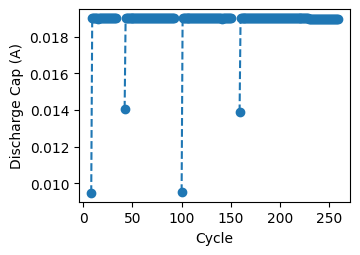

In [13]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

# BatteryData denotes cycle types, such "Aging Cycles"
#  `Cycle_Label` is not standardized under the battery-data-toolkit schemas, but you can still use it
aging_cycles = dataset.cycle_stats.query('Cycle_Label=="Aging cycle"')

ax.plot(aging_cycles['cycle_number'], aging_cycles['discharge_capacity'], '--o')

ax.set_xlabel('Cycle')
ax.set_ylabel('Discharge Cap (A)')

### EIS Data
Data from EIS are stored within the `raw_data` signal in the BatteryData files. Battery Data Toolkit separates that data into a separate dataframe.

Each EIS measurement series is dentoed with a different `test_id`.

In [14]:
dataset.eis_data

,test_id,frequency,z_imag,z_real,z_mag,z_phase
1262,7,500000.00000,0.43070,0.24102,0.493552,60.768595
1263,7,397164.10000,0.32711,0.23778,0.404401,53.986168
1264,7,315478.70000,0.24811,0.23707,0.343163,46.303509
1265,7,250593.60000,0.18190,0.23611,0.298053,37.610787
1266,7,199053.60000,0.12598,0.23687,0.268288,28.006409
...,...,...,...,...,...,...
1335,7,0.02506,-0.40551,1.08970,1.162706,-20.411741
1336,7,0.01991,-0.47431,1.12080,1.217030,-22.937537
1337,7,0.01581,-0.55345,1.16910,1.293484,-25.332797
1338,7,0.01256,-0.64018,1.22860,1.385384,-27.522426


Text(0, 0.5, 'Z, imag (Ohm)')

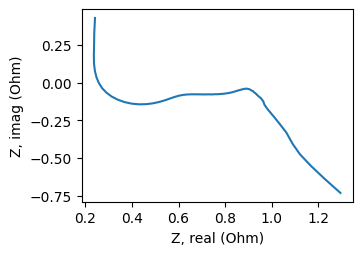

In [15]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.plot(
    dataset.eis_data['z_real'],
    dataset.eis_data['z_imag']
)

ax.set_xlabel('Z, real (Ohm)')
ax.set_ylabel('Z, imag (Ohm)')